In [1]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

2024-11-27 10:33:25.225176: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732683805.319101    4691 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732683805.344259    4691 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-27 10:33:25.616389: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
img = cv2.imread('Train/images_png/0.png')

[ WARN:0@8.389] global loadsave.cpp:241 findDecoder imread_('Train/images_png/0.png'): can't open/read file: check file path/integrity


In [4]:
def unet_model(input_shape=(256, 256, 3), num_classes=6):
    inputs = layers.Input(shape=input_shape)

    # Encoder: Downsampling
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    # Bottleneck
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)

    # Decoder: Upsampling
    u5 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c4)
    u5 = layers.concatenate([u5, c3])
    c5 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u5)
    c5 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c5)

    u6 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c2])
    c6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c1])
    c7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c7)

    # Output layer
    outputs = layers.Conv2D(num_classes, (1, 1), activation='softmax')(c7)

    model = Model(inputs, outputs)
    return model

In [5]:
input_shape = (256, 256, 3)  # Adjust based on your dataset
num_classes = 8  # Adjust based on your dataset
model = unet_model(input_shape=input_shape, num_classes=num_classes)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

W0000 00:00:1732642810.605402   32831 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_2[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │  2,359,808 │ conv2d_6[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 64, 64,    │    524,544 │ conv2d_7[0][0]    │
│ (Conv2DTranspose)   │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 64, 64,    │          0 │ conv2d_transpose… │
│ (Concatenate)       │ 512)              │            │ conv2d_5[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 64, 64,    │  1,179,904 │ concatenate[0][0] │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 64, 64,    │    590,080 │ conv2d_8[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_1  │ (None, 128, 128,  │    131,200 │ conv2d_9[0][0]  

 Total params: 7,697,800 (29.36 MB)

 Trainable params: 7,697,800 (29.36 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
def load_loveda_data(base_path, img_size=(1024, 1024), num_classes=7):
    def load_images_and_masks(image_dir, mask_dir):
        image_paths = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.png')])[:100]
        mask_paths = sorted([os.path.join(mask_dir, f) for f in os.listdir(mask_dir) if f.endswith('.png')])[:100]

        images = []
        masks = []
        for img_path, mask_path in zip(image_paths, mask_paths):
            # Read and resize images
            img = cv2.imread(img_path)
            img = cv2.resize(img, img_size)  # Resize to (256, 256)
            images.append(img)

            # Read and resize masks
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            mask = cv2.resize(mask, img_size)  # Resize to (256, 256)
            masks.append(mask)

        # Normalize images and convert masks to integer labels
        images = np.array(images) / 255.0
        masks = np.array(masks).astype(np.int32)

        return images, masks

    # Define paths
    train_image_dir = os.path.join(base_path, 'Train/images_png')
    train_mask_dir = os.path.join(base_path, 'Train/masks_png')
    val_image_dir = os.path.join(base_path, 'Val/images_png')
    val_mask_dir = os.path.join(base_path, 'Val/masks_png')

    # Load data
    train_images, train_masks = load_images_and_masks(train_image_dir, train_mask_dir)
    val_images, val_masks = load_images_and_masks(val_image_dir, val_mask_dir)

    # Expand mask dimensions (for compatibility with sparse_categorical_crossentropy)
    train_masks = np.expand_dims(train_masks, axis=-1)
    val_masks = np.expand_dims(val_masks, axis=-1)

    return (train_images, train_masks), (val_images, val_masks)

In [6]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("TensorFlow version: ", tf.__version__)

Num GPUs Available:  0
TensorFlow version:  2.18.0


In [7]:
base_path = "./LoveDA"  # Replace with the actual path to your dataset
(train_images, train_masks), (val_images, val_masks) = load_loveda_data(base_path, img_size=(256,256))


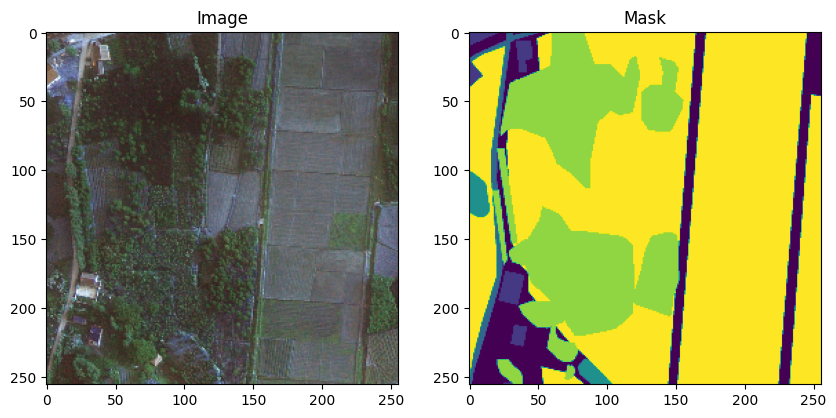

In [8]:
#plot the first image and mask in the training set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(train_images[0])
plt.title('Image')

plt.subplot(1, 2, 2)
plt.imshow(train_masks[0].squeeze())
plt.title('Mask')

plt.show()

In [13]:
batch_size = 8
data_gen_args = dict(rotation_range=15,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     zoom_range=0.2,
                     horizontal_flip=True)
image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

train_gen = zip(image_datagen.flow(train_images, batch_size=batch_size, seed=42),
                mask_datagen.flow(train_masks, batch_size=batch_size, seed=42))

model.fit(
    train_gen,
    steps_per_epoch=len(train_images) // batch_size,
    epochs=25,
    validation_data=(val_images, val_masks)
)

Epoch 1/25
12/12 [==============================] - 117s 10s/step - loss: 1.9349 - accuracy: 0.0026 - val_loss: 1.8574 - val_accuracy: 0.0000e+00
Epoch 2/25
12/12 [==============================] - 117s 10s/step - loss: 1.7214 - accuracy: 0.0000e+00 - val_loss: 1.7898 - val_accuracy: 0.0000e+00
Epoch 3/25
12/12 [==============================] - 114s 10s/step - loss: 1.7634 - accuracy: 0.0000e+00 - val_loss: 1.8142 - val_accuracy: 0.0000e+00
Epoch 4/25
 3/12 [======>.......................] - ETA: 54s - loss: 1.5541 - accuracy: 0.0000e+00 

KeyboardInterrupt: 